# Анализ товарооборота кофеен

# Прогнозирование товарооборота кофеен

## Описание задачи

Вам предложены данные сети кофеен, где целевой переменной является средний товарооборот за определенный промежуток времени. Модель должна прогнозировать товарооборот на основании различных факторов, связанных с окружающей инфраструктурой, транспортными потоками, типом кофейни и характеристиками района.

- **Целевая переменная**: `target` (средний товарооборот)
- **Признаки**: расстояние до метро, количество отзывов, транспортные и пешеходные потоки, характеристики жилых домов, мобильный трафик, тип кофейни.

## Цель проекта

Разработать модель для точного прогнозирования товарооборота кофеен с использованием бизнес-логики отрасли. Основная метрика для оценки модели — MAPE (Mean Absolute Percentage Error).

## Этапы:

1. **Подготовка данных**:
   - Чистка данных
   - Обработка пропущенных значений
   - Разделение на обучающую и тестовую выборки

2. **Построение модели**:
   - Подбор модели
   - Обучение модели на обучающей выборке
   - Кросс-валидация

3. **Оценка модели**:
   - Вычисление MAPE
   - Построение диаграммы рассеивания
   - Интерпретация факторов

## Метрики

- MAPE (средняя абсолютная процентная ошибка)


## 1. Загрузка библиотек

In [54]:
!pip install phik

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from phik import phik_matrix
import numpy as np

## 2. Загрузка наборов данных

In [56]:
df = pd.read_excel('dataset_renamed.xlsx').iloc[:88]
target = 'target'

## 3. Первоначальный осмотр данных

### 3.1 Анализ входного набора данных

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Columns: 2335 entries, id to Тип ТЦ
dtypes: float64(1182), int64(1153)
memory usage: 1.6 MB


In [58]:
# Настройки отображения Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [59]:
df.head()

id    target  Расстояние до метро  Суммарное кол-во отзывов в категории "АЗС" в радиусе 150м  \
0  60  1.292717          5526.692151                                                          0   
1  50  1.674569         16243.183872                                                          0   
2  17  1.140666          6401.230357                                                          0   
3  15  1.352501          2255.498620                                                          0   
4  74  1.324726          5811.209297                                                          0   

   Суммарное кол-во отзывов в категории "Алкомаркеты" в радиусе 150м  \
0                                                                274   
1                                                                  0   
2                                                                194   
3                                                                  0   
4                                                                  0   

   Суммарное кол-во отзывов в категории "Аптеки" в радиусе 150м  \
0                                                            56   
1                                                           719   
2                                                           425   
3                                                             0   
4                                                            71   

   Суммарное кол-во отзывов в категории "Банки" в радиусе 150м  \
0                                                          156   
1                                                          402   
2                                                          271   
3                                                            0   
4                                                            0   

   Суммарное кол-во отзывов в категории "Бизнес_центры" в радиусе 150м  \
0                                                                  249   
1                                                                    0   
2                                                                    0   
3                                                                 1737   
4                                                                    0   

   Суммарное кол-во отзывов в категории "ВУЗы" в радиусе 150м  \
0                                                           0   
1                                                           0   
2                                                           0   
3                                                          83   
4                                                           0   

   Суммарное кол-во отзывов в категории "Вокзалы" в радиусе 150м  \
0                                                              0   
1                                                              0   
2                                                              0   
3                                                              0   
4                                                              0   

   Суммарное кол-во отзывов в категории "Детскиемагазины" в радиусе 150м  \
0                                                                   1268   
1                                                                   3445   
2                                                                     31   
3                                                                      0   
4                                                                   1051   

   Суммарное кол-во отзывов в категории "Жилыедома" в радиусе 150м  \
0                                                                0   
1                                                                0   
2                                                                0   
3                                                                0   
4                                                                0   

   Суммарное кол-во отзывов в категории "Кино" в рад

In [60]:
columns_of_interest = ['Тип БЦ', 'Тип хаб','Тип улица','Тип ТЦ']

unique_values = {col: df[col].unique() for col in columns_of_interest}

for col, unique_vals in unique_values.items():
    print(f"Unique values in column '{col}':")
    print(unique_vals)
    print()

Unique values in column 'Тип БЦ':
[0 1]

Unique values in column 'Тип хаб':
[0 1]

Unique values in column 'Тип улица':
[1 0]

Unique values in column 'Тип ТЦ':
[0 1]



In [61]:
df.describe()

id     target  Расстояние до метро  \
count   88.000000  88.000000            88.000000   
mean    72.329545   1.374264          8134.377632   
std     41.100304   0.182284          7576.537648   
min      0.000000   1.000000           555.615896   
25%     36.500000   1.269808          2999.828308   
50%     72.500000   1.345243          5840.938442   
75%    103.250000   1.472059         11160.489940   
max    147.000000   2.000000         48029.799723   

       Суммарное кол-во отзывов в категории "АЗС" в радиусе 150м  \
count                                                  88.000000   
mean                                                   29.272727   
std                                                   189.336636   
min                                                     0.000000   
25%                                                     0.000000   
50%                                                     0.000000   
75%                                                     0.000000   
max                                                  1666.000000   

       Суммарное кол-во отзывов в категории "Алкомаркеты" в радиусе 150м  \
count                                                          88.000000   
mean                                                          108.659091   
std                                                           239.754035   
min                                                             0.000000   
25%                                                             0.000000   
50%                                                             0.000000   
75%                                                            84.500000   
max                                                          1245.000000   

       Суммарное кол-во отзывов в категории "Аптеки" в радиусе 150м  \
count                                                     88.000000   
mean                                                     211.068182   
std                                                      234.576008   
min                                                        0.000000   
25%                                                       50.750000   
50%                                                      153.000000   
75%                                                      283.250000   
max                                                     1152.000000   

       Суммарное кол-во отзывов в категории "Банки" в радиусе 150м  \
count                                                    88.000000   
mean                                                    277.318182   
std                                                     340.929714   
min                                                       0.000000   
25%                                                       0.000000   
50%                                                     159.000000   
75%                                                     412.750000   
max                                                    1642.000000   

       Суммарное кол-во отзывов в категории "Бизнес_центры" в радиусе 150м  \
count                                                            88.000000   
mean                                                             64.522727   
std                                                             271.821019   
min                                                               0.000000   
25%                                                               0.000000   
50%                                                               0.000000   
75%                                                               0.000000   
max                                                            1737.000000   

       Суммарное кол-во отзывов в категории "ВУЗы" в радиусе 150м  \
count                                                   88.000000   
mean                                                    42.147727   
std                                                    186

### 3.2 Оценка распределений признаков и таргета

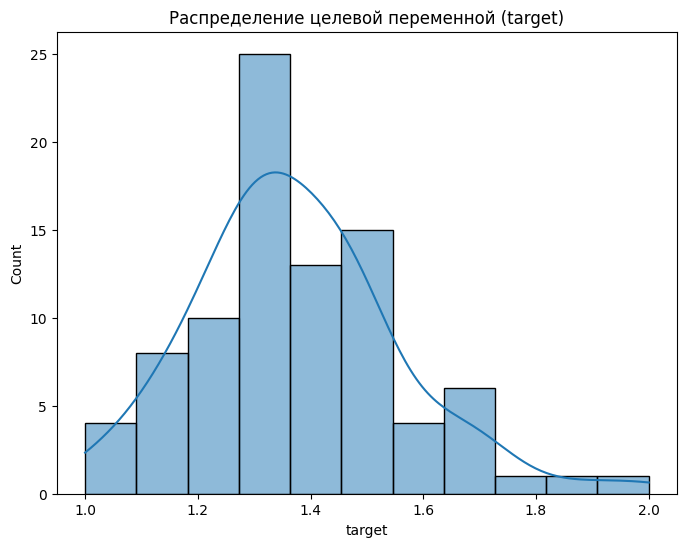

In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], kde=True)
plt.title('Распределение целевой переменной (target)')
plt.show()

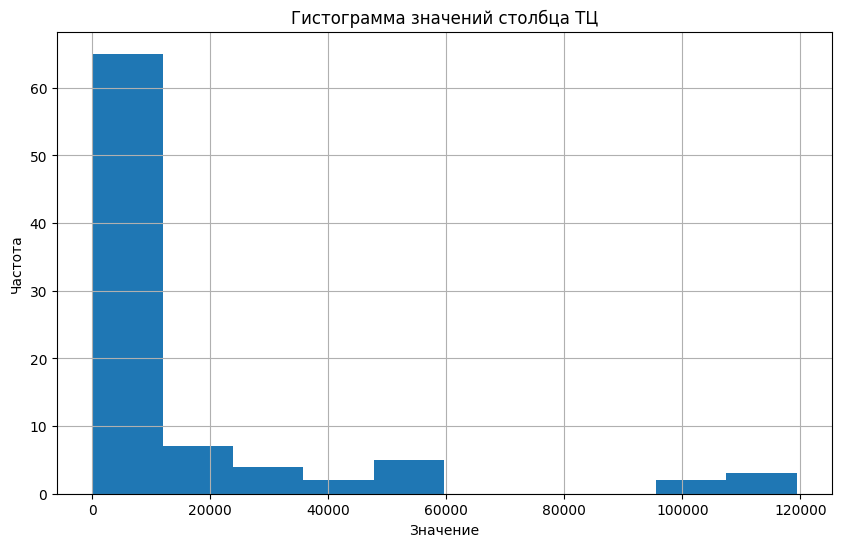

In [63]:
plt.figure(figsize=(10, 6))
df['Суммарное кол-во отзывов в категории "ТЦ" в радиусе 150м'].hist()
plt.title('Гистограмма значений столбца ТЦ')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

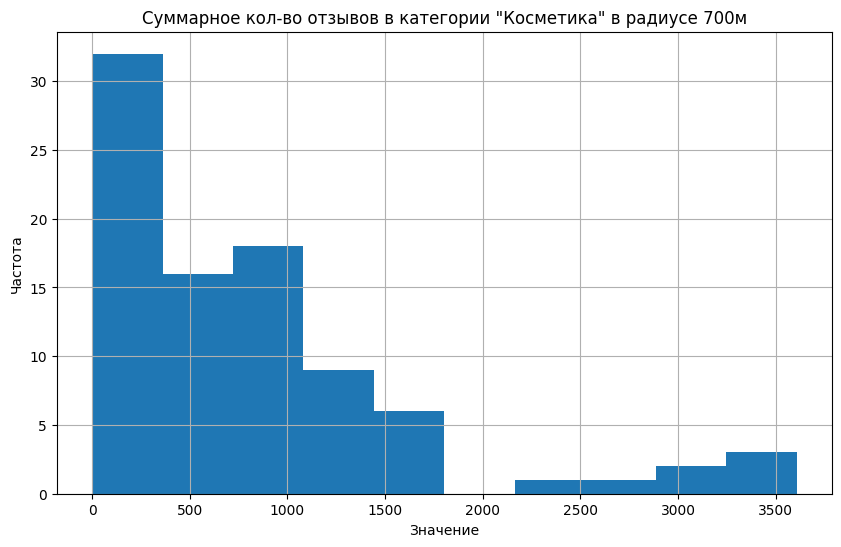

In [64]:
plt.figure(figsize=(10, 6))
df['Суммарное кол-во отзывов в категории "Косметика" в радиусе 700м'].hist()
plt.title('Суммарное кол-во отзывов в категории "Косметика" в радиусе 700м')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

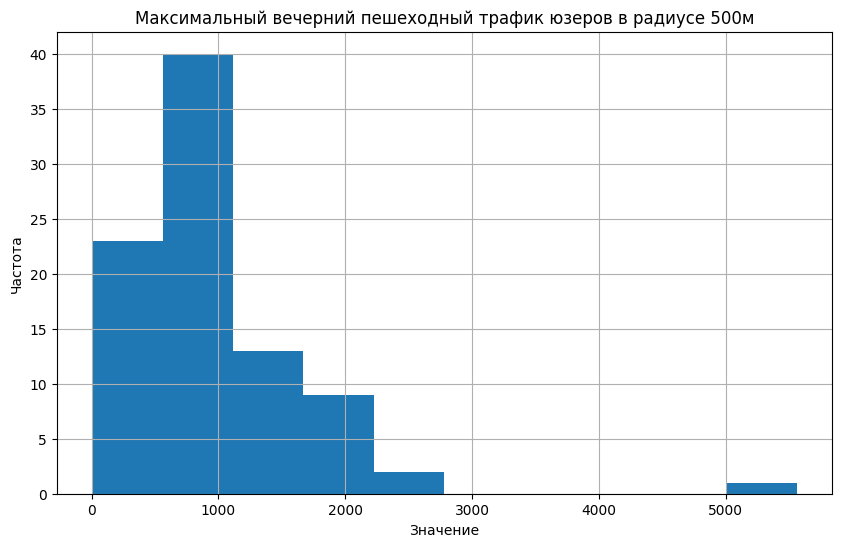

In [65]:
plt.figure(figsize=(10, 6))
df['Максимальный вечерний пешеходный трафик юзеров в радиусе 500м'].hist()
plt.title('Максимальный вечерний пешеходный трафик юзеров в радиусе 500м')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [66]:
(df['Среднее кол-во отзывов в категории "ТЦ" в радиусе 300м'] != 0).sum()

88

In [67]:
# Вывод всех столбцов с нечисловыми данными
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_columns)

[]


<Axes: >

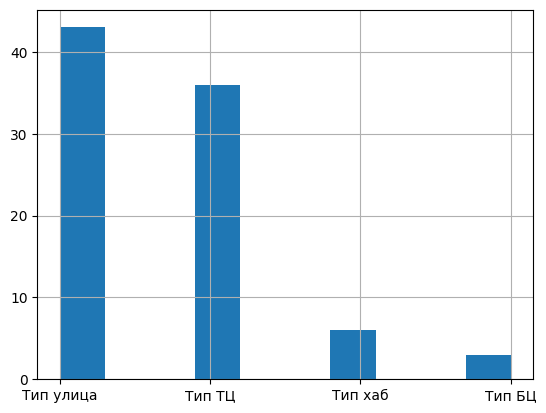

In [68]:
# Создаем новую категориальную переменную "Тип"
def categorize(row):
    categories = []
    for column in columns_to_analyze:
        if row[column] == 1:
            categories.append(column)
    return '-'.join(categories) if categories else 'Нет типа'

columns_to_analyze = ['Тип БЦ', 'Тип хаб', 'Тип улица', 'Тип ТЦ']

df['Тип'] = df[columns_to_analyze].apply(categorize, axis=1)
df['Тип'].hist()

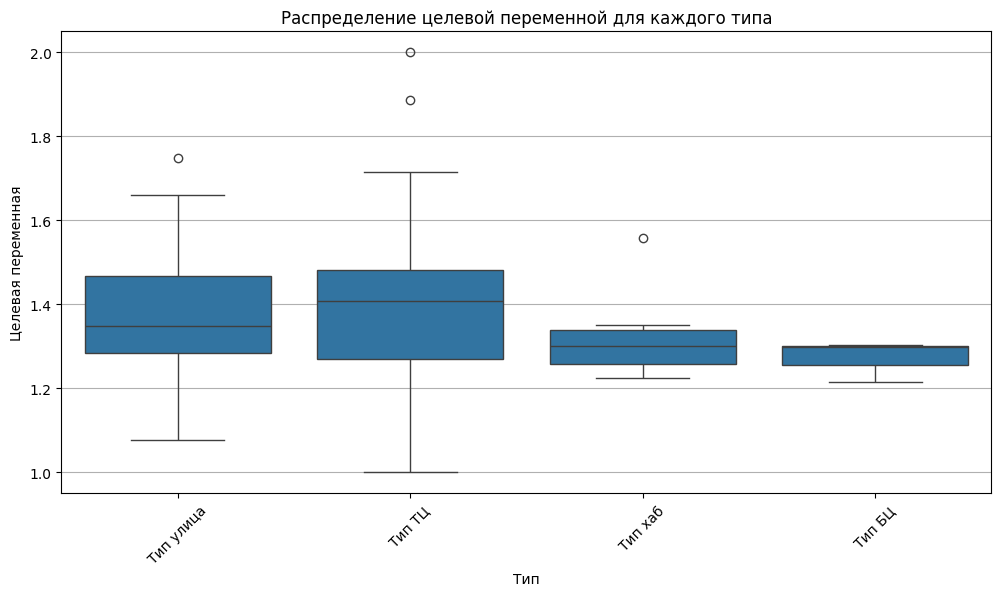

In [69]:
df_filtered = df.dropna(subset=['target'])

# Построим распределение таргета для каждого из типов
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Тип', y='target')
plt.title('Распределение целевой переменной для каждого типа')
plt.xticks(rotation=45)
plt.xlabel('Тип')
plt.ylabel('Целевая переменная')
plt.grid(axis='y')
plt.show()

### 3.3 Корреляционный анализ

In [70]:
columns_to_analyze = ['Тип', 'Максимальный вечерний пешеходный трафик юзеров в радиусе 500м']

df_subset = df[columns_to_analyze + [target]]

phik_corr_report = df_subset.phik_matrix()
target_corr = phik_corr_report[target].drop(target)

print("Корреляция с целевой переменной:")
print(target_corr)

interval columns not set, guessing: ['Максимальный вечерний пешеходный трафик юзеров в радиусе 500м', 'target']
Корреляция с целевой переменной:
Тип                                                              0.000000
Максимальный вечерний пешеходный трафик юзеров в радиусе 500м    0.709504
Name: target, dtype: float64


In [71]:
# Рассчитать процент заполненности для каждого признака (где не пусто, не NaN и не ноль)
percent_filled = (df.notna() & (df != 0)).sum() / len(df) * 100

correlation_with_target = df.loc[:, df.columns[:-1]].corr()['target'].dropna()
high_correlation = correlation_with_target[correlation_with_target > 0.3]

correlation_table = pd.DataFrame({
    'Feature': high_correlation.index,
    'Percent_Filled': percent_filled[high_correlation.index].values,
    'Correlation_with_Target': high_correlation.values
}).sort_values(by='Correlation_with_Target', ascending=False)

In [72]:
correlation_table.loc[(correlation_table['Percent_Filled'] > 50) & (correlation_table['Correlation_with_Target'] > 0.4), :].head(10)

Feature  Percent_Filled  \
0                                                           target      100.000000   
173  Максимальный вечерний пешеходный трафик юзеров в радиусе 500м      100.000000   
172   Максимальный дневной пешеходный трафик юзеров в радиусе 500м      100.000000   
19          Среднее кол-во отзывов в категории "ТЦ" в радиусе 300м       69.318182   
123        Максимальный  пешеходный трафик сигналов в радиусе 700м      100.000000   
131       Максимальный  пешеходный трафик сигналов в радиусе 1000м      100.000000   
175          Максимальный  пешеходный трафик юзеров в радиусе 500м      100.000000   
383  Максимальный вечерний пешеходный трафик юзеров в радиусе 140м      100.000000   
386       Средний вечерний пешеходный трафик юзеров в радиусе 140м      100.000000   
380     Суммарный вечерний пешеходный трафик юзеров в радиусе 140м      100.000000   

     Correlation_with_Target  
0                   1.000000  
173                 0.478880  
172                 0.467708  
19                  0.461710  
123                 0.456238  
131                 0.456238  
175                 0.450462  
383                 0.446531  
386                 0.446531  
380                 0.444809

In [73]:
correlation_table.to_excel('Корреляция.xlsx', index=False)

### 3.4 Высококолерированные с таргетом и не коррелированные друг с другом признаки

In [74]:
correlation_with_target = df[list(correlation_table['Feature'])].corr()['target'].dropna()
high_correlation_features = correlation_with_target[correlation_with_target > 0.3].index
df_high_corr = df[high_correlation_features]
correlation_matrix = df_high_corr.corr().abs()

high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        if correlation_matrix.iloc[i, j] > 0.9:
            high_correlation_pairs.append((feature1, feature2))

# Для каждой пары оставляем признак с более высокой корреляцией с таргетом
features_to_keep = set(high_correlation_features)
for feature1, feature2 in high_correlation_pairs:
    if correlation_with_target[feature1] >= correlation_with_target[feature2]:
        features_to_keep.discard(feature2)
    else:
        features_to_keep.discard(feature1)

filtered_features = list(features_to_keep)
filtered_features

['Средний средний рейтинг объектов в категории "Электроникаибытоваятехника" в радиусе 20м',
 'Средний средний рейтинг объектов в категории "ТЦ" в радиусе 20м',
 'Среднее кол-во отзывов в категории "ТЦ" в радиусе 20м',
 'target',
 'Средний средний рейтинг объектов в категории "Вокзалы" в радиусе 1000м',
 'Среднее кол-во отзывов в категории "Стадионы" в радиусе 150м']

In [75]:
# Найти пары признаков с корреляцией выше 0.5 между собой
high_correlation_pairs = correlation_matrix.where(lambda x: x > 0.5).stack().index.tolist()

# Для каждой пары оставить признак с более высокой корреляцией с таргетом
features_to_keep = set()
for feature1, feature2 in high_correlation_pairs:
    if correlation_with_target[feature1] >= correlation_with_target[feature2]:
        features_to_keep.add(feature1)
    else:
        features_to_keep.add(feature2)

# Оставляем только признаки с учетом корреляции между ними и с таргетом
filtered_features = list(features_to_keep)

# Выводим финальные признаки
filtered_features[:5]

['Средний средний рейтинг объектов в категории "ТЦ" в радиусе 1000м',
 'Максимальный вечерний пешеходный трафик сигналов резидентов в радиусе 700м',
 'Суммарный утренний автомобильный трафик сигналов рабочих в радиусе 500м',
 'Суммарное кол-во отзывов в категории "Одеждаиобувь" в радиусе 1000м',
 'Суммарный вечерний трафик юзеров в радиусе 500м']

In [76]:
# Проверка корреляции между двумя столбцами
correlation_value = df["Максимальный вечерний пешеходный трафик юзеров в радиусе 140м"].corr(df["Максимальный вечерний пешеходный трафик юзеров в радиусе 500м"])

# Вывод результата
print(f"Корреляция между двумя столбцами: {correlation_value:.2f}")

Корреляция между двумя столбцами: 0.68


### 3.5 Корреляционная матрица самых интересных признаков

In [77]:
features = [
    'Суммарное кол-во отзывов в категории "ТЦ" в радиусе 150м',
    'Суммарное кол-во отзывов в категории "Детскиемагазины" в радиусе 150м',
    'Суммарное кол-во отзывов в категории "Хозтоварыидом" в радиусе 150м',
    'Суммарное кол-во отзывов в категории "Электроникаибытоваятехника" в радиусе 150м',
    'Средний  пешеходный трафик юзеров в радиусе 300м',
    'Средний  автомобильный трафик юзеров рабочих в радиусе 500м',
    'Суммарное кол-во отзывов в категории "Косметика" в радиусе 300м',
]

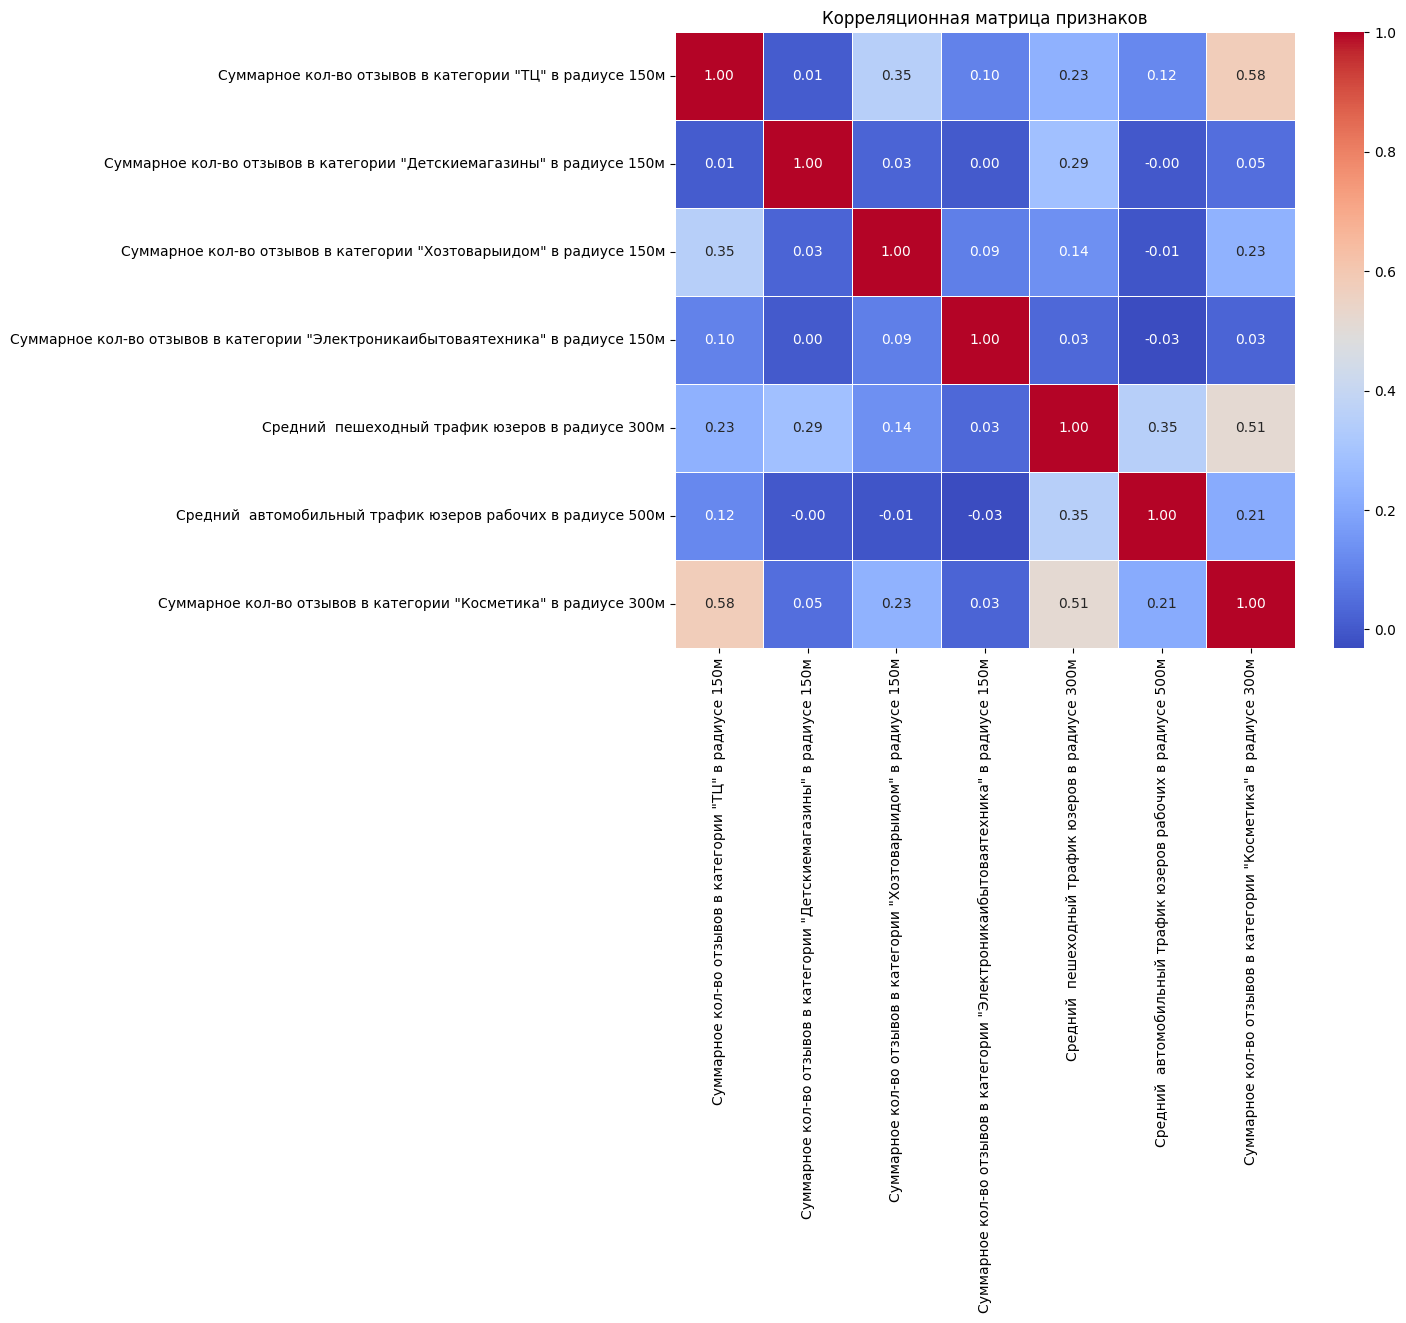

In [78]:
corr_matrix = df[features].corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()


## 4. Построение модели

### 4.1 Рекурсивный отбор интересных признаков

In [79]:
filtered_features[:5]

['Средний средний рейтинг объектов в категории "ТЦ" в радиусе 1000м',
 'Максимальный вечерний пешеходный трафик сигналов резидентов в радиусе 700м',
 'Суммарный утренний автомобильный трафик сигналов рабочих в радиусе 500м',
 'Суммарное кол-во отзывов в категории "Одеждаиобувь" в радиусе 1000м',
 'Суммарный вечерний трафик юзеров в радиусе 500м']

In [80]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target = 'target'
df = df.fillna(0)
X = df[filtered_features]
y = df[target]

# Проверка на пропуски
print(X.isnull().sum())
print(y.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

rfecv = RFECV(estimator=model, step=1, cv=5)
rfecv.fit(X_train, y_train)

ranking = list(zip(features, rfecv.ranking_))
sorted_features = sorted(ranking, key=lambda x: x[1])
top_4_features = [feature for feature, rank in sorted_features[:4]]

Средний средний рейтинг объектов в категории "ТЦ" в радиусе 1000м             0
Максимальный вечерний пешеходный трафик сигналов резидентов в радиусе 700м    0
Суммарный утренний автомобильный трафик сигналов рабочих в радиусе 500м       0
Суммарное кол-во отзывов в категории "Одеждаиобувь" в радиусе 1000м           0
Суммарный вечерний трафик юзеров в радиусе 500м                               0
                                                                             ..
Суммарный средний рейтинг объектов в категории "Косметика" в радиусе 500м     0
Максимальный вечерний пешеходный трафик сигналов резидентов в радиусе 500м    0
Максимальный вечерний пешеходный трафик сигналов рабочих в радиусе 700м       0
Суммарный дневной автомобильный трафик сигналов рабочих в радиусе 500м        0
Средний  пешеходный трафик сигналов в радиусе 1000м                           0
Length: 392, dtype: int64
0


In [81]:
top_4_features

['Суммарное кол-во отзывов в категории "Косметика" в радиусе 300м',
 'Средний  автомобильный трафик юзеров рабочих в радиусе 500м',
 'Средний  пешеходный трафик юзеров в радиусе 300м',
 'Суммарное кол-во отзывов в категории "ТЦ" в радиусе 150м']

### 4.2 Построение базовой модели

In [82]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Загрузка данных
df = df.fillna(0)

target = 'target'

features = [
    'Суммарное кол-во отзывов в категории "Пунктывыдачи" в радиусе 500м',
    'Максимальный утренний автомобильный трафик сигналов рабочих в радиусе 500м',
    'Суммарное количество объектов в категории "Электроникаибытоваятехника" в радиусе 700м',
    'Средний средний рейтинг объектов в категории "Пекарни" в радиусе 150м'
    #'Тип ТЦ'
]

my_features = [
    'Тип ТЦ',
    'Среднее кол-во отзывов в категории "ТЦ" в радиусе 300м',
    'Максимальный вечерний пешеходный трафик юзеров в радиусе 500м',
    ]

Top_features = [
    'Суммарное кол-во отзывов в категории "Пунктывыдачи" в радиусе 500м',
    'Максимальный вечерний пешеходный трафик юзеров в радиусе 500м',
    'Среднее кол-во отзывов в категории "ТЦ" в радиусе 300м',
    'Суммарное кол-во отзывов в категории "Пекарни" в радиусе 150м'
]

X = df[Top_features]
y = df[target]

In [83]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

In [84]:
mape = mean_absolute_percentage_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
mae = np.mean(np.abs(y - y_pred))

# Вывод метрик
print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"MAE: {mae:.4f}")

MAPE: 0.0892
RMSE: 0.1548
R^2: 0.2702
MAE: 0.1208


In [85]:
y_pred

array([1.31590304, 1.58274875, 1.32830103, 1.41300368, 1.42486995,
       1.48437717, 1.34958361, 1.35743048, 1.37621134, 1.35205446,
       1.33561047, 1.23709644, 1.27854187, 1.37272278, 1.44452926,
       1.41753893, 1.47748097, 1.31286404, 1.49992865, 1.43600199,
       1.38191836, 1.33127373, 1.50085779, 1.38032908, 1.28386246,
       1.27460331, 1.28871953, 1.85264996, 1.55085547, 1.39168502,
       1.29262691, 1.52746071, 1.31783553, 1.36932897, 1.29869293,
       1.32034623, 1.48903276, 1.36532376, 1.37861327, 1.27275185,
       1.27277118, 1.30855224, 1.29069239, 1.33581549, 1.58668044,
       1.31505169, 1.40832172, 1.30215775, 1.34573377, 1.3000018 ,
       1.36581094, 1.55853146, 1.36129944, 1.47433609, 1.4331441 ,
       1.31535787, 1.43916133, 1.35552996, 1.29850817, 1.33242515,
       1.30055563, 1.25854691, 1.44777473, 1.30218719, 1.2938879 ,
       1.33843386, 1.35625237, 1.31055868, 1.47433609, 1.60148583,
       1.41654311, 1.33680932, 1.34199484, 1.23513321, 1.36287

Диаграмма рассеивания факта и прогноза

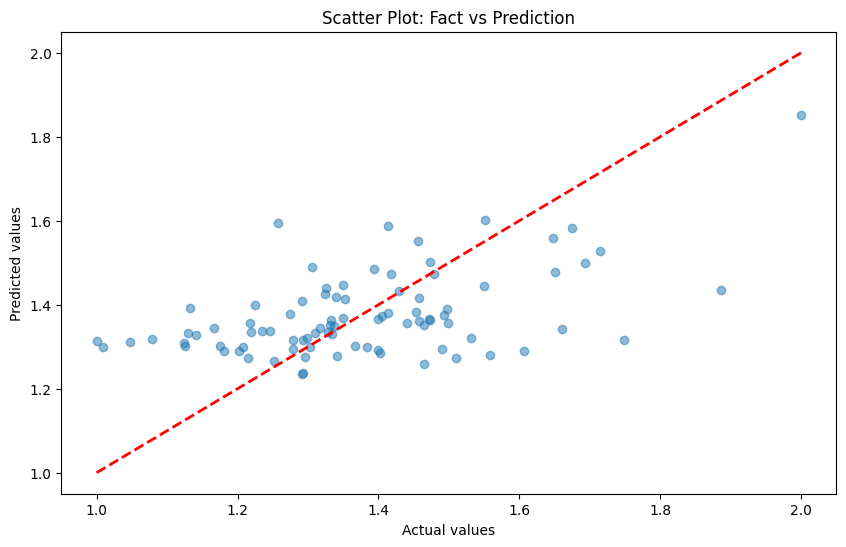

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Предсказания с использованием обученной модели на кросс-валидации
y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

# Диаграмма рассеивания фактических значений и прогноза
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Scatter Plot: Fact vs Prediction')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


Процентная гистограмма ошибок модели

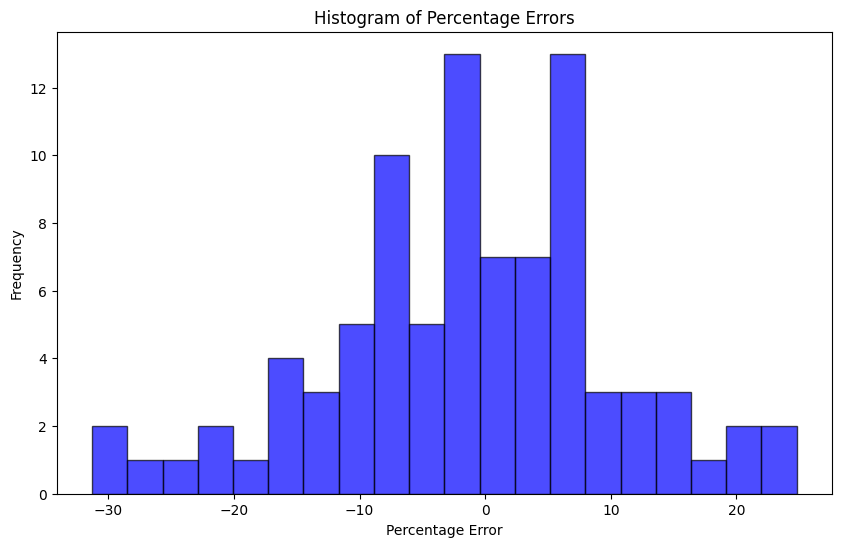

In [87]:
# Рассчёт процентной ошибки
errors = (y - y_pred) / y * 100

# Гистограмма процентных ошибок
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Percentage Errors')
plt.xlabel('Percentage Error')
plt.ylabel('Frequency')
plt.show()


Интерпретация вклада факторов

MAPE: 0.0892
RMSE: 0.1548
R^2: 0.2702
                                                              Feature  Importance
1       Максимальный вечерний пешеходный трафик юзеров в радиусе 500м    0.076816
2              Среднее кол-во отзывов в категории "ТЦ" в радиусе 300м    0.051244
0  Суммарное кол-во отзывов в категории "Пунктывыдачи" в радиусе 500м   -0.008987
3       Суммарное кол-во отзывов в категории "Пекарни" в радиусе 150м   -0.026367


Text(0, 0.5, 'Features')

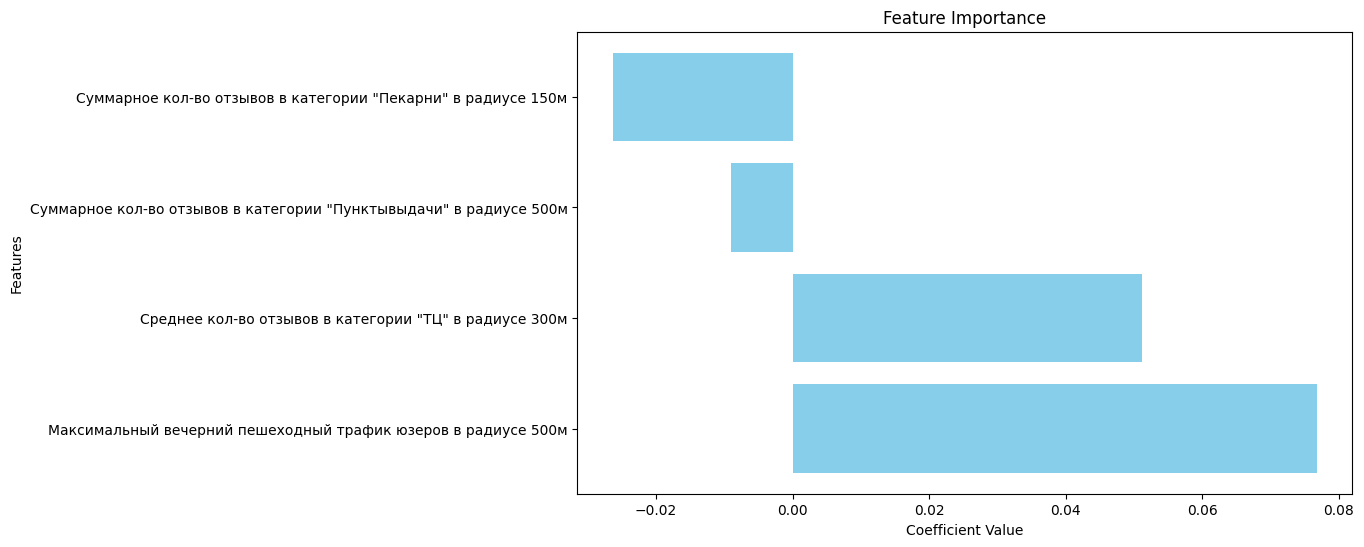

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Предполагаем, что данные уже загружены
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Модель линейной регрессии
model = LinearRegression()

# Кросс-валидация для метрик
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

# Метрики
mape = mean_absolute_percentage_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

# Теперь обучаем модель на всех данных, чтобы получить коэффициенты
model.fit(X_scaled, y)

# Достаём коэффициенты
coef = model.coef_
feature_importance = pd.DataFrame({'Feature': Top_features, 'Importance': coef})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

# Построение графика важности факторов
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')


## 5 Построение пронозов на тесте

In [108]:
df = pd.read_excel('dataset_renamed.xlsx')
df = df.fillna(0)


In [104]:
df[Top_features]

Суммарное кол-во отзывов в категории "Пунктывыдачи" в радиусе 500м  \
0                                                                 1272   
1                                                                  236   
2                                                                  108   
3                                                                   31   
4                                                                   68   
..                                                                 ...   
83                                                                  53   
84                                                                 748   
85                                                                1251   
86                                                                   0   
87                                                                  58   

    Максимальный вечерний пешеходный трафик юзеров в радиусе 500м  \
0                                                             510   
1                                                            2234   
2                                                             491   
3                                                            1295   
4                                                             842   
..                                                            ...   
83                                                            124   
84                                                           1081   
85                                                            759   
86                                                           1212   
87                                                           1564   

    Среднее кол-во отзывов в категории "ТЦ" в радиусе 300м  \
0                                              4834.666667   
1                                             38700.500000   
2                                                 0.000000   
3                                                 0.000000   
4                                             24174.000000   
..                                                     ...   
83                                              173.000000   
84                                             1357.000000   
85                                             4682.750000   
86                                            59652.000000   
87                                               21.000000   

    Суммарное кол-во отзывов в категории "Пекарни" в радиусе 150м  
0                                                              43  
1                                                              60  
2                                                               0  
3                                                              30  
4                                                               0  
..                                                            ...  
83                                                             40  
84                                                            388  
85                                                              0  
86                                                             31  
87                                                            325  

[88 rows x 4 columns]

In [110]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Соответствующим образом обновите целевую переменную


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Предполагаем, что данные загружены в DataFrame `df`

# Задаем список признаков для обучения
Top_features = [
    'Суммарное кол-во отзывов в категории "Пунктывыдачи" в радиусе 500м',
    'Максимальный вечерний пешеходный трафик юзеров в радиусе 500м',
    'Среднее кол-во отзывов в категории "ТЦ" в радиусе 300м',
    'Суммарное кол-во отзывов в категории "Пекарни" в радиусе 150м'
]

# Разделяем данные: обучающая выборка до 88 строки, тестовая после
train_data = df.iloc[:88, :]  # До 88 записи
test_data = df.iloc[88:, :]    # С 88 записи (где нет таргета)

# Разделяем признаки и целевую переменную для обучения
X_train = train_data[Top_features]  # Используем только указанные признаки
y_train = train_data['target']       # Целевая переменная для обучения

# Проверка и обработка NaN в X_train
X_train.loc[:, :] = X_train.fillna(X_train.mean())

# Признаки для теста (с 88 записи)
X_test = test_data[Top_features]  # Используем только указанные признаки

# Проверка и обработка NaN в X_test
if X_test.isnull().any().any():
    X_test.loc[:, :] = X_test.fillna(X_test.mean())  # Или dropna() для удаления

# Проверка на наличие данных в X_test
if X_test.empty:
    print("X_test пустой. Проверьте данные.")
else:
    # Стандартизация данных
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Обучение модели на обучающей выборке
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Предсказания для тестовых данных (с 88 строки)
    y_pred = model.predict(X_test_scaled)

    # Сохранение предсказаний в DataFrame
    predictions = pd.DataFrame({'ID': test_data['id'], 'Predicted target': y_pred})

    # Сохранение предсказаний в CSV файл
    predictions.to_csv('predicted_target.csv', index=False)

    print("Предсказания для тестовых данных (с 88 записи) сохранены в 'predicted_target.csv'")


Предсказания для тестовых данных (с 88 записи) сохранены в 'predicted_target.csv'


In [115]:
predictions

ID  Predicted target
88    3          1.943037
89   25          1.297163
90   55          1.676274
91   69          1.581390
92  109          1.315508
93  112          1.470094
94  117          1.448611
95  126          1.516446
96  144          1.323610
97  145          1.307116

                                                              Feature  Importance
1       Максимальный вечерний пешеходный трафик юзеров в радиусе 500м    0.076997
2              Среднее кол-во отзывов в категории "ТЦ" в радиусе 300м    0.052378
0  Суммарное кол-во отзывов в категории "Пунктывыдачи" в радиусе 500м   -0.004944
3       Суммарное кол-во отзывов в категории "Пекарни" в радиусе 150м   -0.024313


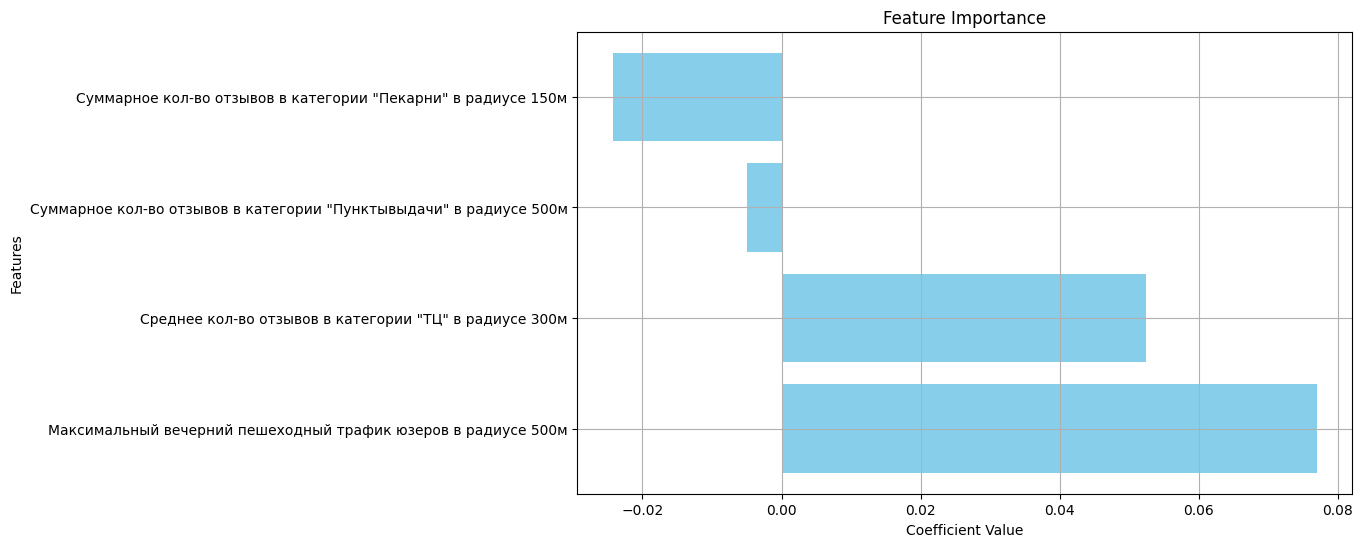

In [116]:
# Интерпретация вклада факторов (коэффициенты)
coef = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': coef})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

# Построение графика важности факторов
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()